In [1]:
!pip install opendatasets

In [5]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: syedosamaalishah092
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


100%|██████████| 2.29G/2.29G [01:52<00:00, 21.9MB/s]


In [6]:
import random, os
import numpy as np
import torch
from fastai.vision.all import *

In [7]:
path = Path('/content/chest-xray-pneumonia/chest_xray/'); path.ls()

(#5) [Path('/content/chest-xray-pneumonia/chest_xray/chest_xray'),Path('/content/chest-xray-pneumonia/chest_xray/test'),Path('/content/chest-xray-pneumonia/chest_xray/val'),Path('/content/chest-xray-pneumonia/chest_xray/train'),Path('/content/chest-xray-pneumonia/chest_xray/__MACOSX')]

In [8]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

dls = data.dataloaders(path)

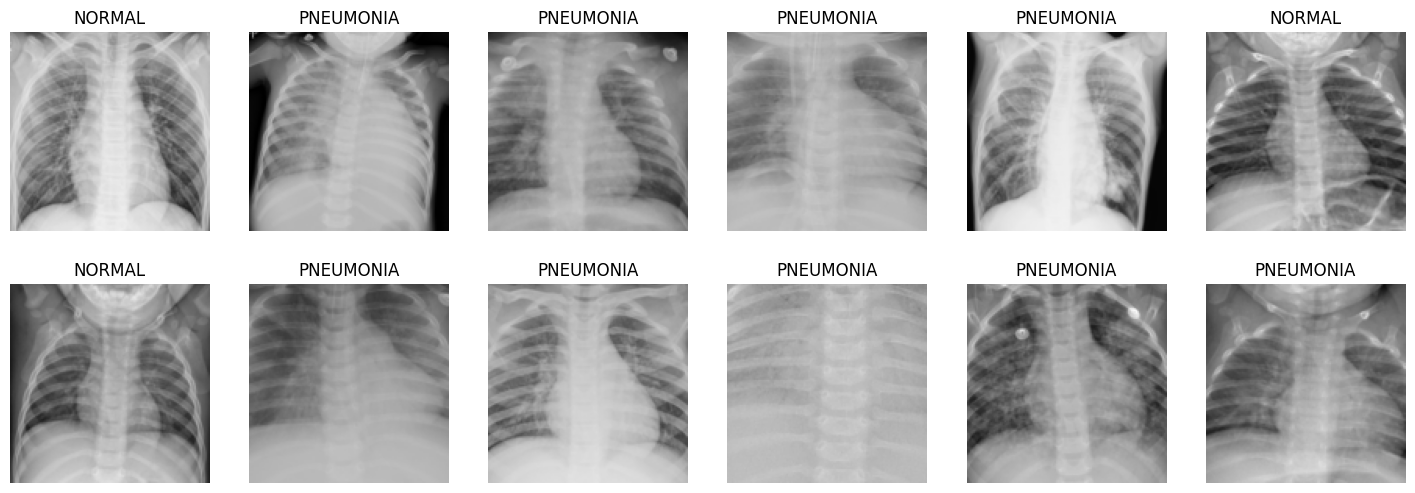

In [9]:
dls.valid.show_batch(max_n=12, nrows=2)

In [10]:
print(dls.vocab)

['NORMAL', 'PNEUMONIA']


In [11]:
len(dls.train_ds), len(dls.valid_ds)

(9370, 2342)

In [12]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate,accuracy])
learn.fine_tune(6)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 221MB/s]


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.386033,0.241659,0.072588,0.927412,00:36


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.141300,0.113043,0.030316,0.969684,00:36
1,0.097032,0.083017,0.025619,0.974381,00:35
2,0.060336,0.047992,0.013237,0.986763,00:35
3,0.031784,0.036394,0.009821,0.990179,00:35
4,0.022357,0.036276,0.009394,0.990606,00:35
5,0.016530,0.033790,0.008967,0.991033,00:36


In [13]:
learn.save('model_1')

Path('models/model_1.pth')

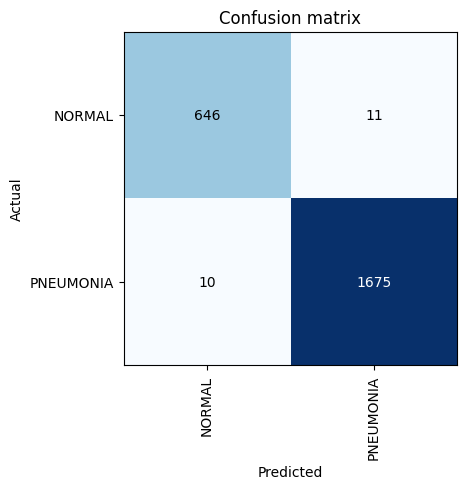

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

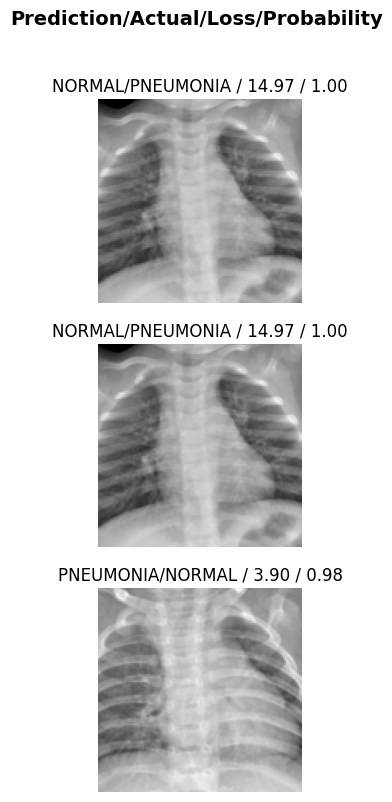

In [15]:
interp.plot_top_losses(3, nrows=3)

ValueError: not enough values to unpack (expected 2, got 1)

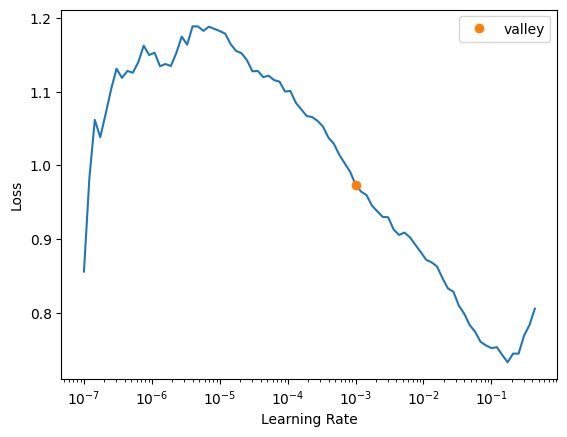

In [16]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()

In [18]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate,accuracy])
learn.fine_tune(6, base_lr=5e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.336152,0.158982,0.061059,0.938941,00:34


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.119009,0.080562,0.029035,0.970965,00:34
1,0.093256,0.093084,0.029035,0.970965,00:35
2,0.057624,0.040692,0.011956,0.988044,00:34
3,0.044246,0.040188,0.013237,0.986763,00:34
4,0.020259,0.047224,0.009821,0.990179,00:34
5,0.013581,0.044792,0.007686,0.992314,00:33


In [19]:
learn.save('model_2')

Path('models/model_2.pth')

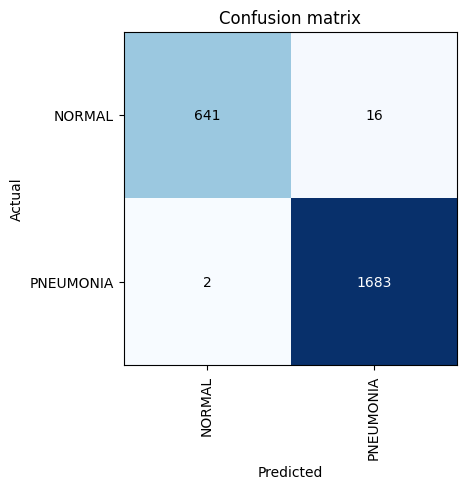

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

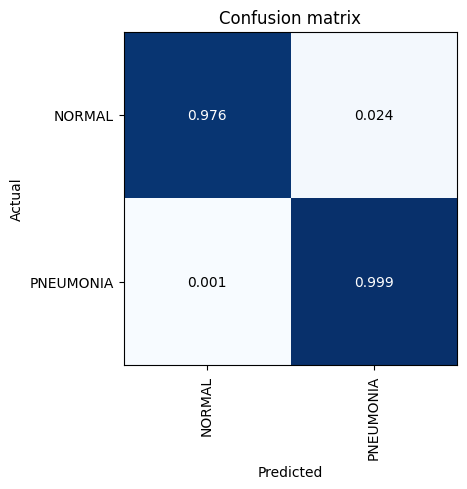

In [21]:
interp.plot_confusion_matrix(normalize=True, norm_dec=3)

In [22]:
interp.most_confused(min_val=1)

[('NORMAL', 'PNEUMONIA', 16), ('PNEUMONIA', 'NORMAL', 2)]

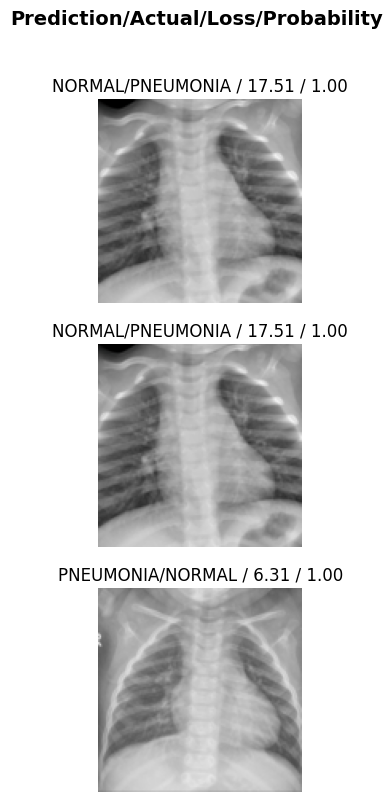

In [23]:
interp.plot_top_losses(3, nrows=3)

In [24]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate,accuracy])
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.226746,0.127860,0.042272,0.957728,00:33
1,0.113528,0.075669,0.025192,0.974808,00:33
2,0.079625,0.063809,0.023484,0.976516,00:33


In [25]:
learn.unfreeze()

SuggestedLRs(valley=7.585775892948732e-05)

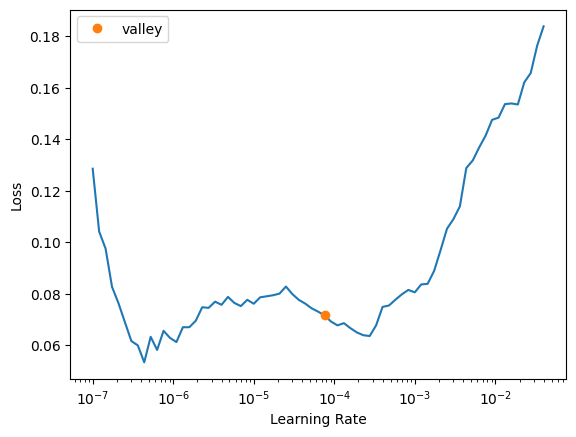

In [26]:
learn.lr_find()

In [27]:
learn.fit_one_cycle(5, lr_max=1e-6)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.069523,0.061265,0.023484,0.976516,00:34
1,0.067137,0.060200,0.023911,0.976089,00:34
2,0.063716,0.057834,0.022203,0.977797,00:33
3,0.061174,0.058064,0.022203,0.977797,00:34


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.069523,0.061265,0.023484,0.976516,00:34
1,0.067137,0.060200,0.023911,0.976089,00:34
2,0.063716,0.057834,0.022203,0.977797,00:33
3,0.061174,0.058064,0.022203,0.977797,00:34
4,0.062689,0.057865,0.023057,0.976943,00:33


In [28]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate,accuracy])
learn.fit_one_cycle(3, 5e-3)
learn.unfreeze()
learn.fit_one_cycle(8, lr_max=slice(5e-3,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.232445,0.095304,0.033305,0.966695,00:34
1,0.130077,0.098089,0.036294,0.963706,00:33
2,0.082811,0.077716,0.020922,0.979078,00:33


epoch,train_loss,valid_loss,error_rate,accuracy,time


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.140280,0.340201,0.103757,0.896242,00:33
1,0.155176,0.293780,0.121691,0.878309,00:33
2,0.132590,0.116416,0.046114,0.953886,00:33
3,0.114011,0.122003,0.043980,0.956020,00:34
4,0.095341,0.074739,0.029889,0.970111,00:34
5,0.074643,0.064644,0.021776,0.978224,00:33
6,0.046405,0.043106,0.015798,0.984202,00:34
7,0.029206,0.044509,0.015371,0.984628,00:33


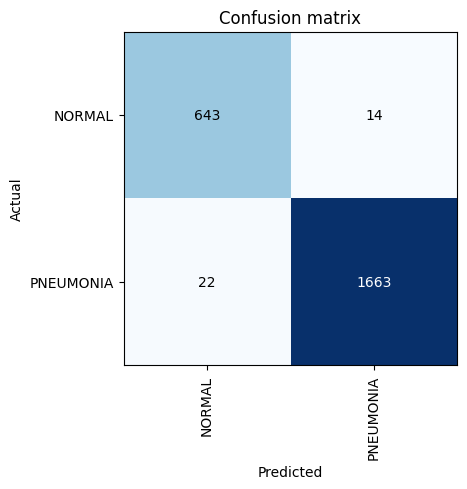

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()